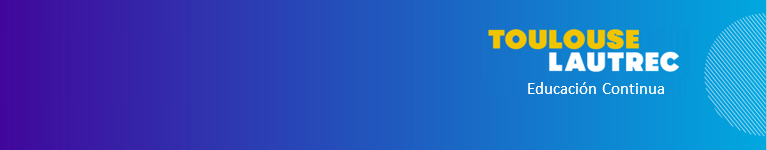

#**APRENDIZAJE AUTOMÁTICO CON PYTHON**


----------------------------
**SESIÓN N°2: Lazypredict: Ejecute todos los algoritmos de Sklearn para clasificación**  

Docente: Luis Bautista


#**1. Lazy Predict en Python para aprendizaje automático**

- **Lazy Predict** es la única herramienta que necesita para sus proyectos de modelado predictivo.

- Es una herramienta simple y eficiente que hace que sus proyectos de modelado predictivo sean más fáciles y rápidos.

- Es fácil de usar y fácil de instalar. Lazy Predict es de código abierto y se publica **bajo la licencia MIT**.



#**2. Instalación y cómo importarlo**

In [1]:
#Intalación
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [2]:
#Importando las librerias
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#**3. Ejemplo de Clasifiación**

In [11]:
#Importando los datos "boston"
data = pd.read_csv('Telecom Churn.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.10,110,45.07,...,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.60,123,27.47,...,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.40,114,41.38,...,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.40,71,50.90,...,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.70,113,28.34,...,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False


In [12]:
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.10,110,45.07,...,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.60,123,27.47,...,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.40,114,41.38,...,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.40,71,50.90,...,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.70,113,28.34,...,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False


In [13]:
#Separando las variables (dependiente e independientes)
X, y = data.drop('churn', axis= 1), data['churn']
X= X.drop('phone number', axis= 1)
X= X.drop('state', axis= 1)

In [14]:
# Segmentación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [15]:
#Transformación de datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
#Entrenado los modelos de regresión
models, predictions = LazyClassifier().fit(X_train, X_test, y_train, y_test)
print(models[:10])

 97%|█████████▋| 28/29 [00:07<00:00,  2.56it/s]

[LightGBM] [Info] Number of positive: 384, number of negative: 2282
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2400
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144036 -> initscore=-1.782165
[LightGBM] [Info] Start training from score -1.782165


100%|██████████| 29/29 [00:07<00:00,  3.77it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.96               0.87     0.87      0.95   
BaggingClassifier                  0.95               0.87     0.87      0.95   
XGBClassifier                      0.95               0.87     0.87      0.95   
RandomForestClassifier             0.95               0.85     0.85      0.94   
DecisionTreeClassifier             0.92               0.85     0.85      0.92   
ExtraTreesClassifier               0.93               0.76     0.76      0.92   
GaussianNB                         0.88               0.76     0.76      0.88   
NearestCentroid                    0.76               0.74     0.74      0.79   
QuadraticDiscriminantAnalysis      0.88               0.73     0.73      0.87   
ExtraTreeClassifier                0.87               0.71     0.71      0.86   

                           

**LazyClassifier** nos devuelve 5 variables, los modelos con los datos de entrenamiento y las predicciones de los modelos para los datos de Test. En la tabla a continuación se muestran los 10 primeros modelos para los datos de train. Tener en cuenta de que **con LazyClassifier lanzamos 38 modelos**. Como métricas para modelos de clasificación están en Accuracy, pero podemos elegir la métrica que queramos.

Para tener una mejor visualización, vamos tirar de seaborn y representar la métrica que seleccionemos para cada modelo. Además, lo representaremos horizontalmente para que sea más fácil leer los ejes y comparar barras.

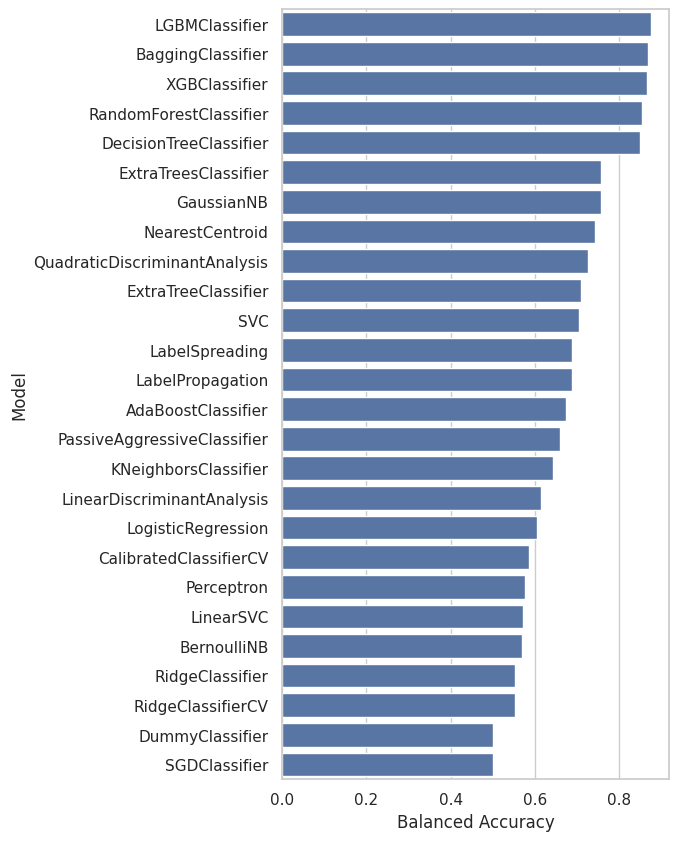

In [17]:
#Visualizando el mejor modelo
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Balanced Accuracy", data=predictions)